In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from IPython.display import YouTubeVideo, Image

# Problem Set 2

## Directions

1. Show all work/steps/calculations. If it is easier to write it out by hand, do so and submit a scanned PDF in addition to this notebook. Otherwise, generate a Markdown cell for each answer. You should thus submit 2-3 items:
    1. the .ipynb version of the notebook.
    2. the .html version of the notebook `$ jupyter nbconvert <name of notebook>.ipynb`. This is the copy that will be graded.
    3. (optional) PDF of hand written sections.
2. **All** work is to be your own. This is not a group project. You may, however, use code from the lectures and labs. Provide citations for any code that is not your own. You may also consult Stackoverflow, etc. This is not by any means "closed book" or anything like that. Basically, I need to see if *you* learned the concepts from the Labs.
3. Add whatever markdown or code cells you need in each part to explain and calculate your answers. Don't just provide answers but explain them as well. **Explain and interpret your results. Explain your decisions.** Why are you picking this procedure? Why are you defining the ROPE to be that size? What does a "90% Bayesian Confidence Interval" of (24.5, 27.8) *mean*?

## Question 1 - Bad Charts

**Part 1.**

Based on the principles discussed in the Visualization Module and the Rules presented,

1. What are the chief problems with the following chart?
2. Present an alternative.

In [3]:
Image(url="http://skepchick.org/wp-content/uploads/2015/06/CNN-weed-chart.jpg")

1.

<b>What's wrong:</b><br>
-Uses shape and 2-d size to convey meaning which breaks the human preattentive processing principles<br>
-Basically a pie chart<br>
-Principle of similarity makes it hard to tell any difference between the wedges<br>
-Even though it looks like a pie chart, the percentages don't add up to 100.<br>

<b>Alternative:</b> A simple bar chart would better convey the percentage of each age group that has smoked weed.

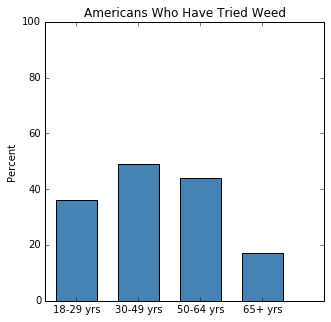

In [10]:
figure = plt.figure(figsize=(5,5))
axes = figure.add_subplot(1, 1, 1)
axes.bar([0,1,2,3], [36,49,44,17], 1/1.5, color="steelblue", align="center")
axes.set_xticks([0, 1, 2, 3, 4])
axes.set_xticklabels(["18-29 yrs","30-49 yrs","50-64 yrs","65+ yrs"])
axes.set_title( "Americans Who Have Tried Weed")
axes.set_ylabel("Percent")
axes.set_ylim((0,100))
axes.xaxis.grid(False)
plt.show()

**Part 2.**

Based on the principles discussed in the Visualization Module and the Rules presented,

1. What are the chief problems with the following chart?
2. Present an alternative(s). Make whatever assumptions you need to make but explain them.

In [4]:
Image(url="http://www.essexrecordofficeblog.co.uk/wp-content/uploads/2015/01/Death-pie-chart.jpg")

1.

<b>What's wrong:</b><br>
-Pie chart<br>
-Red and green colors are highly saturated and not color blind safe<br>
-Principle of similarity makes it hard to determine the size of the wedges compared to others<br>
-There's a negative percentage? I'm assuming that's a typo, otherwise the pie chart doesn't add up to 100<br>
<b>Alternatives: </b><br>
-A simple bar chart of percentages<br>
-Nested bar chart<br>

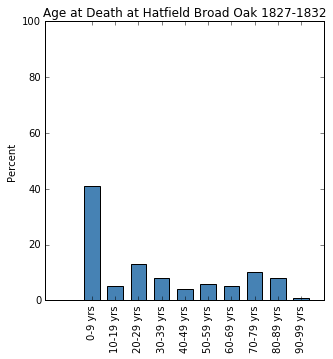

In [19]:
figure = plt.figure(figsize=(5,5))
axes = figure.add_subplot(1, 1, 1)
axes.bar([0,1,2,3,4,5,6,7,8,9], [41,5,13,8,4,6,5,10,8,1], 1/1.5, color="steelblue", align="center")
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(["0-9 yrs","10-19 yrs","20-29 yrs","30-39 yrs","40-49 yrs","50-59 yrs","60-69 yrs","70-79 yrs","80-89 yrs","90-99 yrs"], rotation=90)
axes.set_title( "Age at Death at Hatfield Broad Oak 1827-1832")
axes.set_ylabel("Percent")
axes.set_ylim((0,100))
axes.xaxis.grid(False)
plt.show()

## Question 2 - Obtaining and Querying Data

In Lab 5, we obtained data from a Wikipedia page. This time we're going to start with a Wikipedia page but obtain and transform the supporting data.

1. View [Top 100 Contractors of the U.S. federal government](https://en.wikipedia.org/wiki/Top_100_Contractors_of_the_U.S._federal_government).
2. If you follow footnote 6, you can obtain the raw data for FY2013 which is an Excel file.
3. The Excel file is divided into tabs. The first tab covers all the Federal government while the remaining tabs are by department. Create a SQLite3 database of the department specific actions (contracts) and dollar amounts. It should have **two** tables. The first "contractors" should have an id (as a primary key) and a global_vendor_name (as a varchar). The second should include an id (primary key), department, actions (number of actions), dollars (dollars obligated) and contractor_id as a foreign key to the contractors table. **Submit your database along with any support files (to create the tables) along with this notebook.**
4. Reading the Excel file and creating the database should be automated with no cutting and pasting so that you could regenerate the database for a corrected file or for FY2014 (assuming it had the same format). Both `xlrd` and `openpyxl` are included in Anaconda. (Translating the file from .xls to .xlsx *is* permitted but may not be required).
5. After generating the database, connect to it and answer the 3 questions.

In [5]:
import sqlite3
conn = sqlite3.connect('government_jobs')

1. What are the total actions and dollars obligated by department?
2. What is Johns Hopkins University's number of actions and dollars by department?
3. What is the count of vendors by deparments (how many vendors received contracts from 1 department, 2 departments, etc.). Using the percent of total vendors (instead of raw counts), make a chart of these results using the principles discussed in class. Does this distribution look familiar (does it look like any mathematical distribution you recognize)?

<b>Query #1</b>

In [6]:
cursor = conn.execute('''SELECT department,actions,dollars from ACTIONS''')
results = cursor.fetchall()

actions_map = {}
dollars_map = {}
for row in results:
    if row[0] in actions_map.keys():
        actions_map[row[0]] += row[1]
        dollars_map[row[0]] += row[2]
    else:
        actions_map[row[0]] = row[1]
        dollars_map[row[0]] = row[2]
        
for department in actions_map.keys():
    print "Department %s had %d actions and $%.2f dollars obligated." % (department, actions_map[department], dollars_map[department])

Department Defense Microelectronics (9771) had 648 actions and $520230343.68 dollars obligated.
Department Interior (1400) had 8139 actions and $1919173298.51 dollars obligated.
Department Defense Media (97F1) had 554 actions and $90717821.34 dollars obligated.
Department Treasury (2000) had 7703 actions and $5983407645.08 dollars obligated.
Department Housing & Urban Dev (8600) had 932 actions and $1660496502.56 dollars obligated.
Department DoD (9700) had 7295791 actions and $202418786010.23 dollars obligated.
Department DCMA (9763) had 5301 actions and $520872121.26 dollars obligated.
Department Labor (1600) had 3171 actions and $1757983245.64 dollars obligated.
Department Defense Security (97AT) had 781 actions and $60514620.90 dollars obligated.
Department Defense Finance (97BZ) had 567 actions and $142426536.64 dollars obligated.
Department DARPA (97AE) had 857 actions and $703646965.02 dollars obligated.
Department EPA (6800) had 10868 actions and $1166137639.30 dollars obligate

<b>Query #2</b>

In [7]:
# Find Hopkins contractor ID
cursor = conn.execute('''SELECT "index" from contractors where contractor == "JOHNS HOPKINS UNIVERSITY"''')
results = cursor.fetchone()
hopkins_id = results[0]

cursor = conn.execute('''SELECT department,actions,dollars,contractor_id from ACTIONS''')
results = cursor.fetchall()
for row in results:
    if row[3] == hopkins_id:
        print "Department %s had %d actions and $%.2f dollars obligated to Johns Hopkins University." % \
            (row[0], row[1], row[2])

Department DoD (9700) had 1323 actions and $694288428.73 dollars obligated to Johns Hopkins University.
Department NASA (8000) had 386 actions and $161738805.37 dollars obligated to Johns Hopkins University.
Department Health & Human Services (7500) had 203 actions and $64355268.78 dollars obligated to Johns Hopkins University.
Department Navy (1700) had 706 actions and $481078617.82 dollars obligated to Johns Hopkins University.
Department DARPA (97AE) had 20 actions and $7151694.00 dollars obligated to Johns Hopkins University.
Department Washington Headquarters (97F5) had 7 actions and $1829516.00 dollars obligated to Johns Hopkins University.
Department Defense Threat Reduction (9761) had 7 actions and $857789.00 dollars obligated to Johns Hopkins University.
Department Missile Defense (97JC) had 244 actions and $154261243.93 dollars obligated to Johns Hopkins University.
Department US Special Operations (97ZS) had 15 actions and $2569066.24 dollars obligated to Johns Hopkins Unive

<b>Query #3</b>

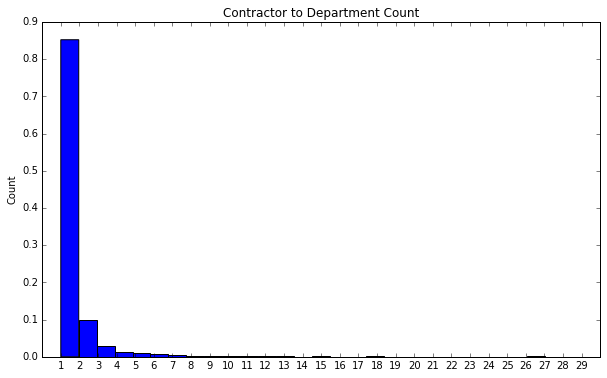

In [8]:
cursor = conn.execute('''SELECT department,contractor_id from ACTIONS''')
results = cursor.fetchall()
contractor_count = {}
for row in results:
    if row[1] in contractor_count.keys():
        contractor_count[row[1]].append(row[0])
    else:
        contractor_count[row[1]] = list()
        contractor_count[row[1]].append(row[0])

contractor_counts = []
for contractor in contractor_count.keys():
    contractor_counts.append(len(contractor_count[contractor]))
    
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1,1,1)
axes.hist(contractor_counts, normed=True, bins=28)
axes.set_xticks([i for i in xrange(1,30)])
axes.set_title("Contractor to Department Count")
axes.set_ylabel("Count")
plt.show()

This looks a lot like the exponential distribution with $\lambda$ > 1.5.